In [55]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

from utils.folder import ImageFolder
from utils.common_utils import *
import visdom
import numpy as np

vis = visdom.Visdom()

plt.ion()   # interactive mode

## to start visdom server
sudo /home/yuan/anaconda3/bin/python -m visdom.server


In [65]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'e2e': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.4, 0.4, 0.4], [0.4, 0.4, 0.4])
    ]),
}

data_dir = 'data'
image_datasets = {x: ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['e2e']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=1)
              for x in ['e2e']}

use_gpu = torch.cuda.is_available()



In [66]:
use_gpu

False

Visualize a few images
^^^^^^^^^^^^^^^^^^^^^^
Let's visualize a few training images so as to understand the data
augmentations.



torch.Size([4, 3, 224, 224])


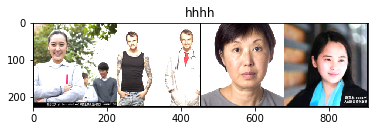

In [67]:
inputs, classes = next(iter(dataloaders['e2e']))
print(inputs.shape)
inputs = inputs*0.5+0.5 #不需要clip  #[0,1]
out = torchvision.utils.make_grid(inputs)


def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp,0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

imshow(out, title='hhhh')

# img = np_to_pil(alphas[0].numpy())
# img.show() #显示方法之一
# img.save('bb.png')



In [68]:
model = torch.load('model.ppp')

In [69]:
def denomalize(nparray):
    #return nparray*0.5+0.5
    return np.clip(nparray,-1,1)*0.5+0.5

def RGBAShow(batch,title):
    batch = batch.cpu().detach().numpy()
    out = np.concatenate((batch[0],batch[1],batch[2],batch[3]), axis=2)
    vis.image(denomalize(out),win =title,opts=dict(title=title))

        

In [74]:
i = 0;
for data in dataloaders['e2e']:
    # get the inputs ,labels没有用，只是必须有这层结构
    inputs, labels = data
    # wrap them in Variable
    if use_gpu:
        inputs = Variable(inputs.cuda())
        labels = Variable(labels.cuda())
    else:
        inputs, labels = Variable(inputs), Variable(labels)
    # forward
    outputs = model(inputs)
    RGBAShow(inputs+outputs*0.5,'out'+str(i))
    i = i+1
    


/Users/roger/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1749: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
